# Intitutive Explanation of Expectation Maximization Algorithm

Probabilistic models, such as hidden Markov models or Bayesian networks, are commonly used to model biological data. Much
of their popularity can be attributed to the existence of efficient and robust procedures for learning parameters from observations. 

Often, however, the only data available for training a probabilistic model are incomplete. Missing values can occur, for example, in medical diagnosis, where patient histories generally include results from a limited battery of tests.

Alternatively, in gene expression clustering, incomplete data arise from the intentional omission of gene-to-cluster assignments in the probabilistic model. 

**The expectation maximization algorithm enables parameter estimation in probabilistic models with incomplete data.**

### What is EM?

- The Expectation-Maximization (EM) algorithm is a way to find **maximum-likelihood estimates** for model parameters when your data is incomplete, has missing data points, or has unobserved (hidden) latent variables.

- It is an **iterative way to approximate the maximum likelihood function.**

- While maximum likelihood estimation can find the “best fit” model for a set of data, it doesn’t work particularly well for incomplete data sets.

- The more complex EM algorithm can find model parameters even if you have missing data. It works by choosing random values for the missing data points, and using those guesses to estimate a second set of data. The new values are used to create a better guess for the first set, and the process continues until the algorithm converges on a fixed point.

### How EM is different from MLE?

Although Maximum Likelihood Estimation (MLE) and EM can both find “best-fit” parameters, how they find the models are very different.

- MLE accumulates all of the data first and then uses that data to construct the most likely model.
- EM takes a guess at the parameters first — accounting for the missing data — then tweaks the model to fit the guesses and the observed data.

### How EM works?

The basic steps for the algorithm are:

1. An initial guess is made for the model’s parameters and a probability distribution is created. This is sometimes called the “E-Step” for the “Expected” distribution.
2. Newly observed data is fed into the model.
3. The probability distribution from the E-step is tweaked to include the new data. This is sometimes called the “M-step.”
4. Steps 2 through 4 are repeated until stability (i.e. a distribution that doesn’t change from the E-step to the M-step) is reached.

This will try to use very less math and just give intution, how EM converges.

### Expectation Maximization using Two Coin example: 

- We have two biased coin and we dont know probability of getting head on each coins. Assume $\theta_A$ and $\theta{_B}$
- We randomly choose one coin and toss it 10 times and repeat this experiment five times.
- A simple way to estimate $\theta_A$ and $\theta_B$ is to return the observed proportions of heads for each coin:

  $$\hat{\theta_A} = \frac{Number ~of~ heads ~using ~coin~ A}{total ~number~ flips~ using~ coin ~A }$$ 
  
  $$\hat{\theta_B} = \frac{Number~ of~ heads ~using ~coin ~B}{total number~ flips ~using~ coin~ B }$$
  
  
This intuitive guess is, in fact, known in the statistical literature as <font color ='red'>Maximum Likelihood Estimation </font>. **As shown in below figure (a)**

<img src="https://i.stack.imgur.com/mj0nb.gif" width="500" height="500">

**More Complicated Problem**:
- If in experiment we just know count of head, but which coin is used for experiment is not known.
- How to estimated probablities of head for each coin? This problem can be solved using <font color='red'>Expectation Maximization.</font>

Steps are shown in above **figure (b)**:
    1. Assume some probablity of head for both the coins.
    2. Create the probability distribution (using binomial distribution). (Expectation)
        Example: for second experiment we have 9 heads and 1 tail.
        
  $$p(A) = \theta_A^9(1-\theta_A)^{10-9} \approx 0.004$$
  
  $$p(B) = \theta_B^9(1-\theta_B)^{10-9} \approx 0.001$$
       
       This give us:
  $$\frac{0.004}{0.004+0.001}=0.8$$
  
  $$\frac{0.001}{0.004+0.001}=0.2$$
    
  Similiary we can calculate the distribution for Coin A and Coin B for each experiment.
  
    3a. Based on distribution calculate the new estimated probability. (Maximization)
    3b. Repeat above two steps.
    4. Give the estimated probablity after convergence.
    
Theoritically it is proven the EM always converges [ref](https://www.cmi.ac.in/~madhavan/courses/dmml2018/literature/EM_algorithm_2coin_example.pdf)


### Expecation maximization for Nomral distribution

In this experiment we will try to find mean and std of two normal distribution.

#### Lets generate some data

In [1]:
import numpy as np
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

np.random.seed(110) # for reproducible random results

# set parameters
red_mean = 3
red_std = 0.8

blue_mean = 7
blue_std = 2

# draw 20 samples from normal distributions with red/blue parameters
red = np.random.normal(red_mean, red_std, size=20)
blue = np.random.normal(blue_mean, blue_std, size=20)

both_colours = np.sort(np.concatenate((red, blue))) 

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

plt.rcParams["figure.figsize"] = (20,3)

Text(0.5,1,'Data(With Label)')

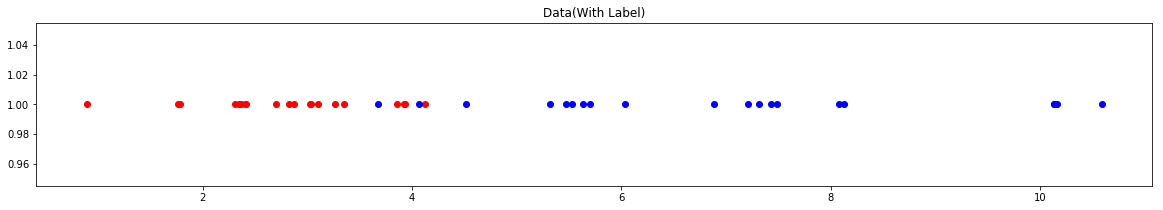

In [5]:
y = [1 for i in range(len(red))]
plt.plot(red, y, 'ro', blue, y, 'bo')
plt.title("Data(With Label)")

**If label is given it is easy problem and we can calucate the mean and std using MLE**

In [6]:
print("Red Mean is {}".format(np.mean(red)))
print("Red Std is {}".format(np.std(red)))
print("")
print("Blue Mean is {}".format(np.mean(blue)))
print("Blue Std is {}".format(np.std(blue)))

Red Mean is 2.8132116984626867
Red Std is 0.8001119672360739

Blue Mean is 6.972553898467638
Blue Std is 2.0388437926931493


**If label is not given. USE EM** 

Text(0.5,1,'Data(Without Label)')

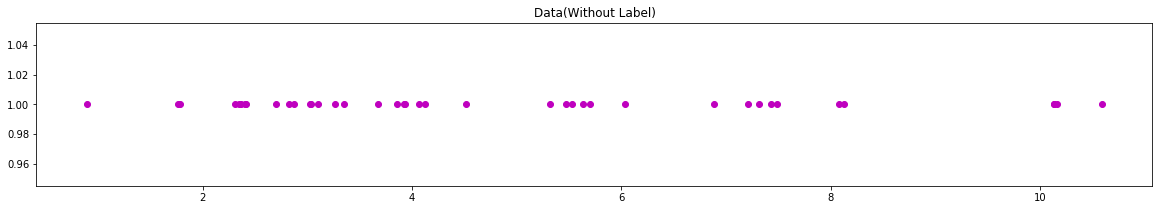

In [7]:
y = [1 for i in range(len(both_colours))]
plt.plot(both_colours,y,'mo')
plt.title("Data(Without Label)")

## STEP 1 (Guess)

In [8]:
# estimates for the mean
red_mean_guess = 1.1
blue_mean_guess = 9

# estimates for the standard deviation
red_std_guess = 2
blue_std_guess = 1.7

### Plot will look like

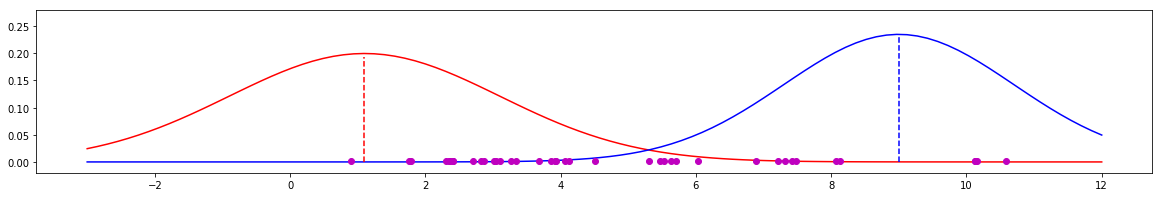

In [9]:
x = np.linspace(-3, 12, 100)
plt.plot(x, mlab.normpdf(x, red_mean_guess, red_std_guess),'r',x, mlab.normpdf(x, blue_mean_guess, blue_std_guess),'b',alpha=1)
plt.ylim(-0.02,0.28)
y = [0.001 for i in range(len(both_colours))]
plt.plot(both_colours,y,'mo')
ymaxr =max(mlab.normpdf(x, red_mean_guess, red_std_guess))/0.28
ymaxb =max(mlab.normpdf(x, blue_mean_guess, blue_std_guess))/0.28
plt.axvline(red_mean_guess, color='r', linestyle='--', ymin=0.067,ymax=ymaxr);
plt.axvline(blue_mean_guess, color='b', linestyle='--',ymin=0.067, ymax=ymaxb);

## Step 2.
### Likelihood of each point under current guess

In [10]:
likelihood_of_red = stats.norm(red_mean_guess, red_std_guess).pdf(both_colours)
likelihood_of_blue = stats.norm(blue_mean_guess, blue_std_guess).pdf(both_colours)

In [11]:
print("likelihood of point {} being red {}".format(both_colours[1],likelihood_of_red[1]))
print("likelihood of point {} being blue {}".format(both_colours[1],likelihood_of_blue[1]))

likelihood of point 1.7617657967268245 being red 0.18884523534521547
likelihood of point 1.7617657967268245 being blue 2.7155455454919998e-05


## Step 3
### Convert Likelihood into Weights

In [12]:
likelihood_total = likelihood_of_red + likelihood_of_blue

red_weight = likelihood_of_red / likelihood_total
blue_weight = likelihood_of_blue / likelihood_total

## Step 4

### With current estimates and new weights we can compute new estimates

The key bit of intuition is that the greater the weight of a colour on a data point, the more the data point influences the next estimates for that colour's parameters. This has the effect of "pulling" the parameters in the right direction.

In [13]:
def estimate_mean(data, weight):
    return np.sum(data * weight) / np.sum(weight)

def estimate_std(data, weight, mean):
    variance = np.sum(weight * (data - mean)**2) / np.sum(weight)
    return np.sqrt(variance)

# new estimates for standard deviation
new_blue_std_guess = estimate_std(both_colours, blue_weight, blue_mean_guess)
new_red_std_guess = estimate_std(both_colours, red_weight, red_mean_guess)

# new estimates for mean
new_red_mean_guess = estimate_mean(both_colours, red_weight)
new_blue_mean_guess = estimate_mean(both_colours, blue_weight)

In [14]:
print("Red Mean New: {} and Blue Mean New: {}".format(new_red_mean_guess,new_blue_mean_guess))

Red Mean New: 3.1844279003578717 and Blue Mean New: 7.651045781252283


## Step 5 (Repeat)
### Lets Run for 5 iteration

3.1844279003578717 7.651045781252283
3.4456051738982914 7.053630693427869
3.2933810421494556 6.884581733005299
3.1699583349617333 6.848715840027546
3.0789827515638435 6.852124794685631


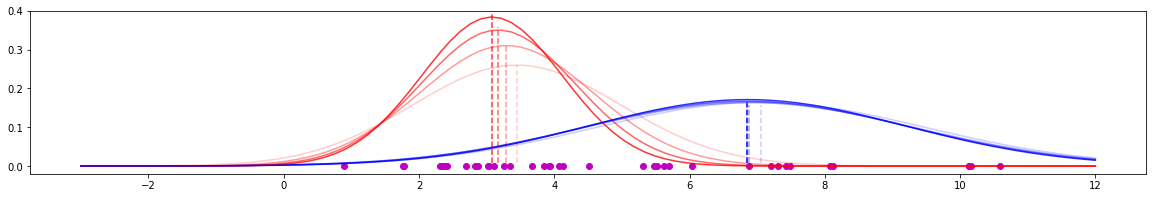

In [15]:
# estimates for the mean
red_mean_guess = 1.1
blue_mean_guess = 9

# estimates for the standard deviation
red_std_guess = 2
blue_std_guess = 1.7


y = [0.001 for i in range(len(both_colours))]
plt.plot(both_colours,y,'mo')
plt.ylim(-0.02,0.40)

for i in range(5):
    likelihood_of_red = stats.norm(red_mean_guess, red_std_guess).pdf(both_colours)
    likelihood_of_blue = stats.norm(blue_mean_guess, blue_std_guess).pdf(both_colours)
    
    likelihood_total = likelihood_of_red + likelihood_of_blue

    red_weight = likelihood_of_red / likelihood_total
    blue_weight = likelihood_of_blue / likelihood_total
    
    blue_std_guess = estimate_std(both_colours, blue_weight, blue_mean_guess)
    red_std_guess = estimate_std(both_colours, red_weight, red_mean_guess)

    red_mean_guess = estimate_mean(both_colours, red_weight)
    blue_mean_guess = estimate_mean(both_colours, blue_weight)
    
    print(red_mean_guess,blue_mean_guess)
    
    x = np.linspace(-3, 12, 100)
    ymaxr =max(mlab.normpdf(x, red_mean_guess, red_std_guess))/0.39
    ymaxb =max(mlab.normpdf(x, blue_mean_guess, blue_std_guess))/0.39

    plt.plot(x, mlab.normpdf(x, red_mean_guess, red_std_guess),'r',x, mlab.normpdf(x, blue_mean_guess, blue_std_guess),'b',alpha=0.2*i)
    plt.axvline(red_mean_guess, color='r', linestyle='--', ymin=0.067,ymax=ymaxr,alpha=0.2*i)
    plt.axvline(blue_mean_guess, color='b', linestyle='--',ymin=0.067, ymax=ymaxb,alpha=0.2*i)



As we can see estimated mean is going near the real mean.

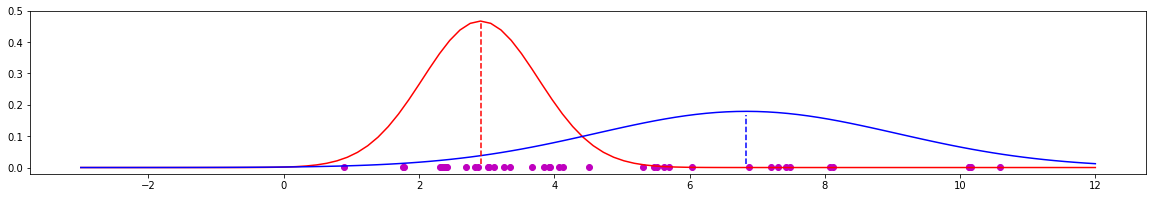

In [16]:
# estimates for the mean
red_mean_guess = 1.1
blue_mean_guess = 9

# estimates for the standard deviation
red_std_guess = 2
blue_std_guess = 1.7

for i in range(20):
    likelihood_of_red = stats.norm(red_mean_guess, red_std_guess).pdf(both_colours)
    likelihood_of_blue = stats.norm(blue_mean_guess, blue_std_guess).pdf(both_colours)
    
    likelihood_total = likelihood_of_red + likelihood_of_blue

    red_weight = likelihood_of_red / likelihood_total
    blue_weight = likelihood_of_blue / likelihood_total
    
    blue_std_guess = estimate_std(both_colours, blue_weight, blue_mean_guess)
    red_std_guess = estimate_std(both_colours, red_weight, red_mean_guess)

    red_mean_guess = estimate_mean(both_colours, red_weight)
    blue_mean_guess = estimate_mean(both_colours, blue_weight)
    
y = [0.001 for i in range(len(both_colours))]
plt.plot(both_colours,y,'mo')
plt.ylim(-0.02,0.50)

x = np.linspace(-3, 12, 100)
ymaxr =max(mlab.normpdf(x, red_mean_guess, red_std_guess))/0.5
ymaxb =max(mlab.normpdf(x, blue_mean_guess, blue_std_guess))/0.5

plt.plot(x, mlab.normpdf(x, red_mean_guess, red_std_guess),'r',x, mlab.normpdf(x, blue_mean_guess, blue_std_guess),'b',alpha=1)
plt.axvline(red_mean_guess, color='r', linestyle='--', ymin=0.06,ymax=ymaxr,alpha=1)
plt.axvline(blue_mean_guess, color='b', linestyle='--',ymin=0.06, ymax=ymaxb,alpha=1)

In [17]:
# ! pip install prettytable

In [18]:
from prettytable import PrettyTable

t = PrettyTable(['', 'EM Guess', 'Actual', 'Delta'])
t.add_row(['Red mean', red_mean_guess, np.mean(red), red_mean_guess-np.mean(red)])
t.add_row(['Red std', red_std_guess, np.std(red), red_std_guess-np.std(red)])
t.add_row(['Blue mean', blue_mean_guess, np.mean(blue), blue_mean_guess-np.mean(blue)])
t.add_row(['Blue std', blue_std_guess, np.std(blue), blue_std_guess-np.std(blue)])
print(t)

+-----------+--------------------+--------------------+----------------------+
|           |      EM Guess      |       Actual       |        Delta         |
+-----------+--------------------+--------------------+----------------------+
|  Red mean | 2.9096206771965387 | 2.8132116984626867 | 0.09640897873385201  |
|  Red std  | 0.8542016076490087 | 0.8001119672360739 | 0.054089640412934736 |
| Blue mean | 6.838227247495596  | 6.972553898467638  | -0.13432665097204133 |
|  Blue std | 2.2271904083245206 | 2.0388437926931493 | 0.18834661563137134  |
+-----------+--------------------+--------------------+----------------------+


### Conclusion

Expecation maximization algorithm should always we there in data scientist toolbox. This tutorial has tried to explain the intuitvely how EM works.

## References

[Intuitive Explanation of EM](https://stackoverflow.com/questions/11808074/what-is-an-intuitive-explanation-of-the-expectation-maximization-technique)

[Expectation Maximization Primer](https://www.cmi.ac.in/~madhavan/courses/dmml2018/literature/EM_algorithm_2coin_example.pdf)

[How EM works](https://math.stackexchange.com/questions/25111/how-does-expectation-maximization-work)
